# **Heart Disease Detection**

 In this part, you will work with the UCI Heart Disease Dataset and perform a multiclass classification to predict the stage of heart disease.    
 The dataset you will work with is composed of 16 attributes: **ID, age, origin, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak (ST depression induced by exercise relative to rest), slope of the peak exercise ST segment, number of major vessels, and Thalassemia.**  
 You will be predicting the "**num**( [0 = no heart disease; 1,2,3,4 = stages of heart disease])" **column**.

In [23]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
subm = pd.read_csv('submission_sample.csv')

In [25]:
train.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,881,62,Male,VA Long Beach,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN,NaN,NaN,4
1,458,54,Male,Hungary,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN,NaN,NaN,0
2,798,51,Male,VA Long Beach,non-anginal,NaN,339.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,3
3,26,50,Female,Cleveland,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat,0.0,normal,0
4,85,52,Male,Cleveland,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping,0.0,normal,0


In [26]:
test.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,320,36,Male,Hungary,atypical angina,120.0,166.0,False,normal,180.0,False,0.0,NaN,NaN,NaN
1,378,45,Male,Hungary,atypical angina,140.0,224.0,True,normal,122.0,False,0.0,NaN,NaN,NaN
2,539,48,Male,Hungary,asymptomatic,160.0,329.0,False,normal,92.0,True,1.5,flat,NaN,NaN
3,297,59,Male,Cleveland,asymptomatic,164.0,176.0,True,lv hypertrophy,90.0,False,1.0,flat,2.0,fixed defect
4,532,40,Female,Hungary,asymptomatic,150.0,392.0,False,normal,130.0,False,2.0,flat,NaN,fixed defect


In [27]:
train.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,881,62,Male,VA Long Beach,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN,NaN,NaN,4
1,458,54,Male,Hungary,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN,NaN,NaN,0
2,798,51,Male,VA Long Beach,non-anginal,NaN,339.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,3
3,26,50,Female,Cleveland,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat,0.0,normal,0
4,85,52,Male,Cleveland,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping,0.0,normal,0


In [28]:
train.shape

(736, 16)

In [29]:
categorical_cols = ['thal', 'ca','slope', 'exang', 'restecg', 'fbs', 'cp' , 'sex', 'num']
bool_cols = ['fbs' , 'exang']
numeric_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'age']


In [30]:
train[train['trestbps'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
511,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3


In [31]:
train.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,736.000000,736.000000,691.000000,711.000000,694.000000,691.000000,250.000000,736.000000
mean,461.173913,53.679348,131.668596,197.763713,137.383285,0.881187,0.688000,0.975543
std,265.515183,9.226723,19.269226,110.881121,26.020584,1.111322,0.960388,1.142595
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,226.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,469.500000,54.000000,130.000000,222.000000,140.000000,0.500000,0.000000,1.000000
75%,686.250000,60.000000,140.000000,266.000000,158.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [32]:
from sklearn.impute import IterativeImputer


ImportError: cannot import name '__version__' from 'sklearn' (unknown location)

In [ ]:
imputer = IterativeImputer(random_state=42, max_iter=10)
train[numeric_cols] = imputer.fit_transform(train[numeric_cols])
test[numeric_cols] = imputer.transform(test[numeric_cols])

test[numeric_cols] = test[numeric_cols].round(0)
train[numeric_cols] = train[numeric_cols].round(0)


In [ ]:
for col in numeric_cols:
    print(f"Missing values in '{col}' after imputation = {test[col].isna().sum()}")


Missing values in 'trestbps' after imputation = 0
Missing values in 'chol' after imputation = 0
Missing values in 'thalch' after imputation = 0
Missing values in 'oldpeak' after imputation = 0
Missing values in 'age' after imputation = 0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        736 non-null    int64  
 1   age       736 non-null    float64
 2   sex       736 non-null    object 
 3   dataset   736 non-null    object 
 4   cp        736 non-null    object 
 5   trestbps  736 non-null    float64
 6   chol      736 non-null    float64
 7   fbs       656 non-null    object 
 8   restecg   735 non-null    object 
 9   thalch    736 non-null    float64
 10  exang     694 non-null    object 
 11  oldpeak   736 non-null    float64
 12  slope     498 non-null    object 
 13  ca        250 non-null    float64
 14  thal      346 non-null    object 
 15  num       736 non-null    int64  
dtypes: float64(6), int64(2), object(8)
memory usage: 92.1+ KB


In [ ]:
#for column in categorical_cols[:-1]:  # Ignore the target column 'num'
#    most_frequent_value = train[column].mode()[0]
#    train[column] = train[column].fillna(most_frequent_value)
#    test[column] = test[column].fillna(most_frequent_value)
train[categorical_cols[:-1]] = train[categorical_cols[:-1]].fillna('Unknown')
test[categorical_cols[:-1]] = test[categorical_cols[:-1]].fillna('Unknown')


In [ ]:
#def random_sampling_imputation(column_train, column_test):
#    non_missing_values_train = column_train.dropna()
#    column_train_filled = column_train.apply(lambda x: np.random.choice(non_missing_values_train) if pd.isnull(x) else x)
#    column_test_filled = column_test.apply(lambda x: np.random.choice(non_missing_values_train) if pd.isnull(x) else x)
#    return column_train_filled, column_test_filled
#

In [ ]:
#for col in categorical_cols:
#    if train[col].isnull().any():
#        train[col], test[col] = random_sampling_imputation(train[col], test[col])


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        736 non-null    int64  
 1   age       736 non-null    float64
 2   sex       736 non-null    object 
 3   dataset   736 non-null    object 
 4   cp        736 non-null    object 
 5   trestbps  736 non-null    float64
 6   chol      736 non-null    float64
 7   fbs       736 non-null    object 
 8   restecg   736 non-null    object 
 9   thalch    736 non-null    float64
 10  exang     736 non-null    object 
 11  oldpeak   736 non-null    float64
 12  slope     736 non-null    object 
 13  ca        736 non-null    object 
 14  thal      736 non-null    object 
 15  num       736 non-null    int64  
dtypes: float64(5), int64(2), object(9)
memory usage: 92.1+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


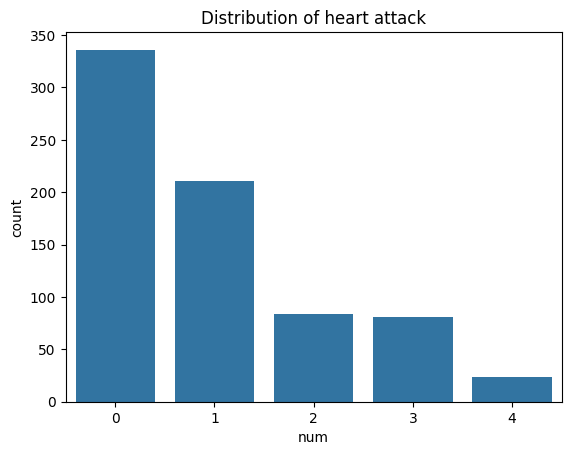

In [ ]:
sns.countplot(data=train, x="num")
plt.title("Distribution of heart attack")
plt.show()


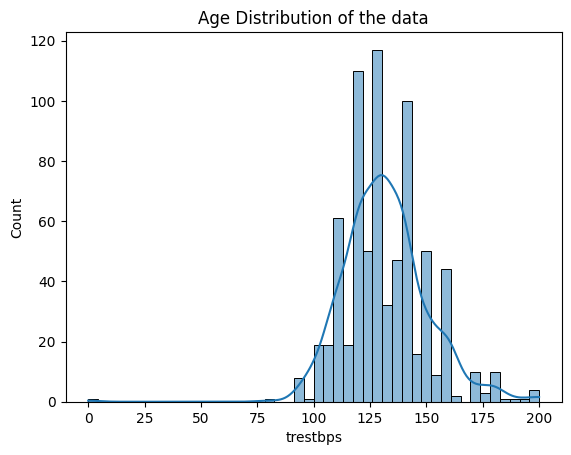

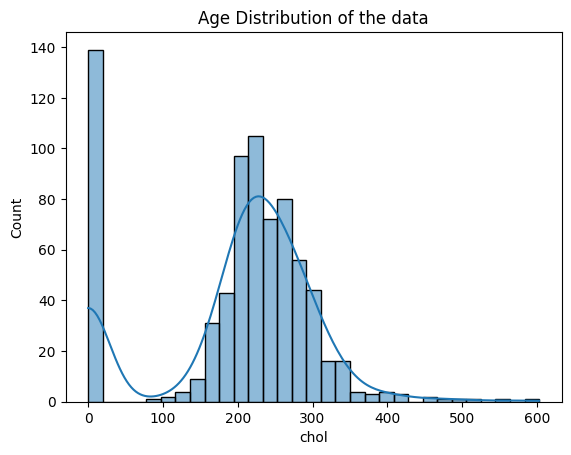

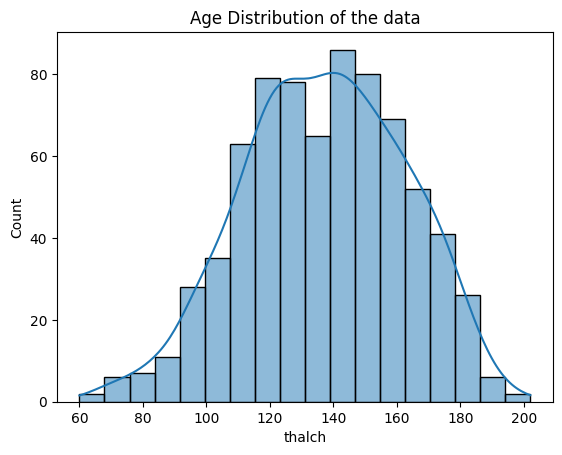

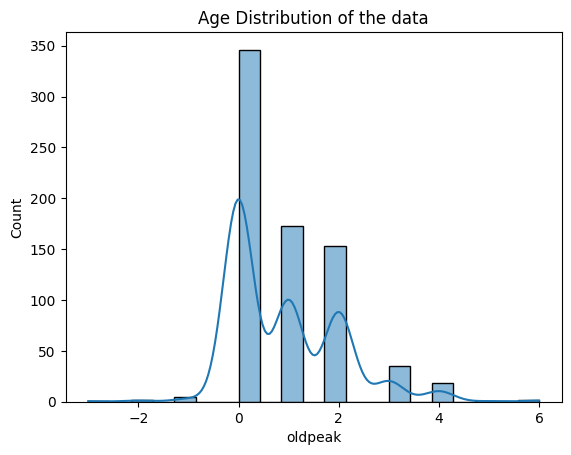

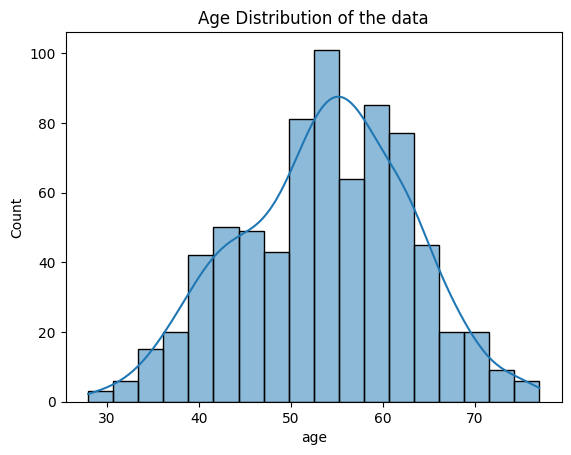

In [ ]:
for col in numeric_cols:

    sns.histplot(train[col], kde=True)
    plt.title("Age Distribution of the data")
    plt.show()


In [ ]:
train['chol'] = train['chol'].replace(0, np.nan)
test['chol'] = test['chol'].replace(0, np.nan)
imputer = IterativeImputer(random_state=42, max_iter=10)
train[numeric_cols] = imputer.fit_transform(train[numeric_cols])
test[numeric_cols] = imputer.transform(test[numeric_cols])

test[numeric_cols] = test[numeric_cols].round(0)
train[numeric_cols] = train[numeric_cols].round(0)

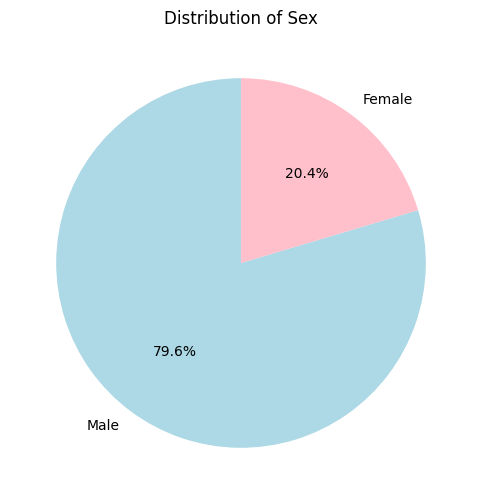

In [ ]:
sex_counts = train['sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribution of Sex')
plt.show()

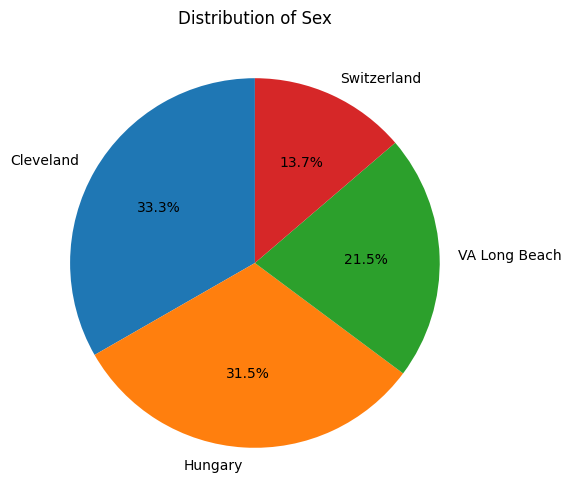

In [ ]:
dataset_counts = train['dataset'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(dataset_counts, labels=dataset_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.show()

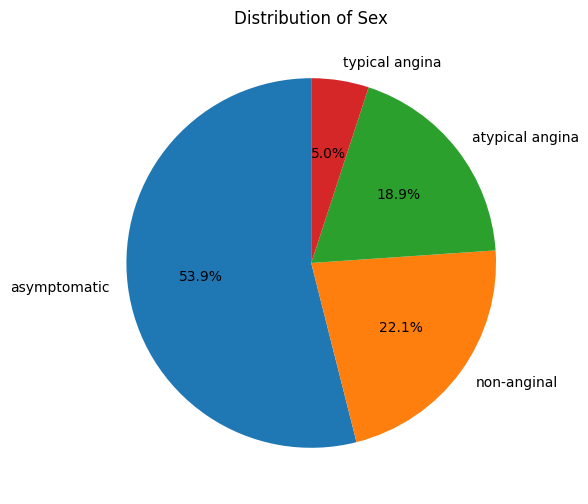

In [ ]:
cp_counts = train['cp'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(cp_counts, labels=cp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.show()

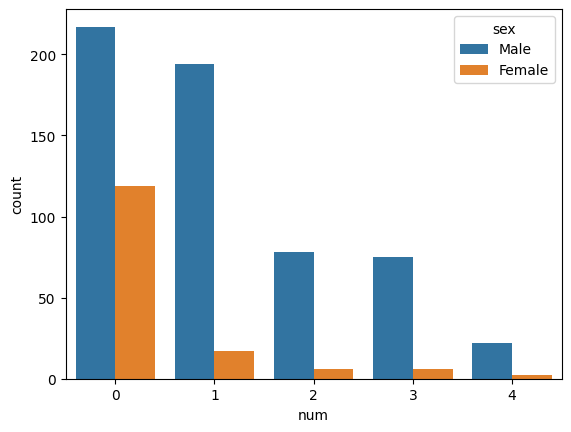

In [ ]:
sns.countplot(data=train, x='num', hue='sex')
plt.show()


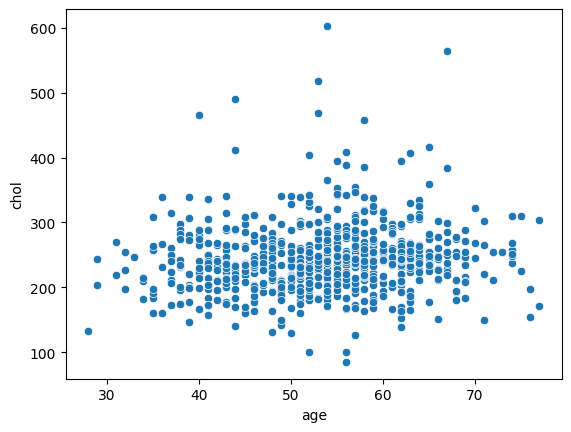

In [ ]:
sns.scatterplot(data=train , x='age', y='chol')
plt.show()


In [ ]:
# train.groupby('sex')['age']


In [ ]:
#def outlier_treatment(df , col):
#    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
#    threshold = 3
#    outliers = (z_scores > threshold)
#    print(f'Number of rows identified as outliers in {col}: {outliers.sum()}')
#    df = df[~outliers]
#    return df


In [ ]:
#train = outlier_treatment(train , 'trestbps')

In [ ]:
def cap_outliers(df, cols):
    for col in cols:
        upper_limit = df[col].mean() + 3 * df[col].std()
        lower_limit = df[col].mean() - 3 * df[col].std()
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
        df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    return df

train = cap_outliers(train, numeric_cols)

In [ ]:
from sklearn.preprocessing import  MinMaxScaler, LabelEncoder

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        736 non-null    int64  
 1   age       736 non-null    float64
 2   sex       736 non-null    object 
 3   dataset   736 non-null    object 
 4   cp        736 non-null    object 
 5   trestbps  736 non-null    float64
 6   chol      736 non-null    float64
 7   fbs       736 non-null    object 
 8   restecg   736 non-null    object 
 9   thalch    736 non-null    float64
 10  exang     736 non-null    object 
 11  oldpeak   736 non-null    float64
 12  slope     736 non-null    object 
 13  ca        736 non-null    object 
 14  thal      736 non-null    object 
 15  num       736 non-null    int64  
dtypes: float64(5), int64(2), object(9)
memory usage: 92.1+ KB


In [ ]:
scaler = MinMaxScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])


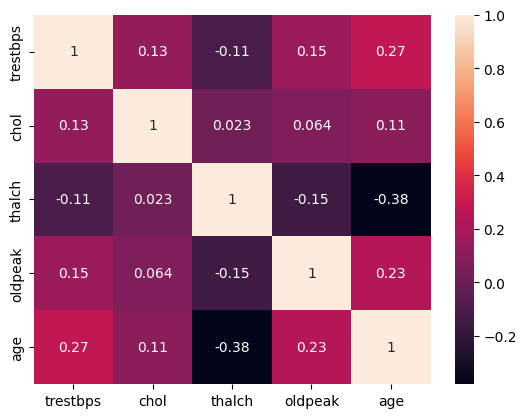

In [ ]:
sns.heatmap(train[numeric_cols].corr(), annot=True)
plt.show()


In [ ]:
train

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,881,0.693878,Male,VA Long Beach,asymptomatic,0.545837,0.267661,False,st-t abnormality,0.419729,True,0.814257,Unknown,Unknown,Unknown,4
1,458,0.530612,Male,Hungary,non-anginal,0.661614,0.340087,False,normal,0.433882,False,0.365725,Unknown,Unknown,Unknown,0
2,798,0.469388,Male,VA Long Beach,non-anginal,0.510213,0.799834,False,normal,0.617871,Unknown,0.515235,Unknown,Unknown,Unknown,3
3,26,0.448980,Female,Cleveland,non-anginal,0.394436,0.421960,False,normal,0.688635,False,0.664746,flat,0.0,normal,0
4,85,0.489796,Male,Cleveland,atypical angina,0.394436,0.755748,False,normal,0.787706,False,0.365725,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,107,0.632653,Male,Cleveland,asymptomatic,0.572554,0.289704,False,normal,0.716941,True,0.365725,upsloping,1.0,reversable defect,2
732,271,0.673469,Male,Cleveland,asymptomatic,0.572554,0.384172,False,lv hypertrophy,0.547106,True,0.664746,upsloping,1.0,reversable defect,1
733,861,0.959184,Male,VA Long Beach,asymptomatic,0.750673,0.708514,True,normal,0.363118,True,0.664746,downsloping,Unknown,reversable defect,0
734,436,0.510204,Female,Hungary,atypical angina,0.572554,0.412513,False,normal,0.575412,True,0.664746,flat,Unknown,Unknown,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        736 non-null    int64  
 1   age       736 non-null    float64
 2   sex       736 non-null    object 
 3   dataset   736 non-null    object 
 4   cp        736 non-null    object 
 5   trestbps  736 non-null    float64
 6   chol      736 non-null    float64
 7   fbs       736 non-null    object 
 8   restecg   736 non-null    object 
 9   thalch    736 non-null    float64
 10  exang     736 non-null    object 
 11  oldpeak   736 non-null    float64
 12  slope     736 non-null    object 
 13  ca        736 non-null    object 
 14  thal      736 non-null    object 
 15  num       736 non-null    int64  
dtypes: float64(5), int64(2), object(9)
memory usage: 92.1+ KB


In [ ]:
#label_encoder = LabelEncoder()
#categorical_cols = ['thal', 'ca','slope', 'exang', 'fbs', 'cp' , 'sex', 'restecg']
#for col in categorical_cols:
#    train[col] = label_encoder.fit_transform(train[col])
#    test[col] = label_encoder.transform(test[col])

# Encoding Categorical Variables
train = pd.get_dummies(train, columns=categorical_cols[:-1], drop_first=True)
test = pd.get_dummies(test, columns=categorical_cols[:-1], drop_first=True)

# Align test data with train data
test = test.reindex(columns=train.columns, fill_value=0)


In [ ]:
train

,id,age,dataset,trestbps,chol,thalch,oldpeak,num,thal_fixed defect,thal_normal,...,exang_Unknown,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,fbs_True,fbs_Unknown,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Male
0,881,0.693878,VA Long Beach,0.545837,0.267661,0.419729,0.814257,4,False,False,...,False,False,False,True,False,False,False,False,False,True
1,458,0.530612,Hungary,0.661614,0.340087,0.433882,0.365725,0,False,False,...,False,False,True,False,False,False,False,True,False,True
2,798,0.469388,VA Long Beach,0.510213,0.799834,0.617871,0.515235,3,False,False,...,True,False,True,False,False,False,False,True,False,True
3,26,0.448980,Cleveland,0.394436,0.421960,0.688635,0.664746,0,False,True,...,False,False,True,False,False,False,False,True,False,False
4,85,0.489796,Cleveland,0.394436,0.755748,0.787706,0.365725,0,False,True,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,107,0.632653,Cleveland,0.572554,0.289704,0.716941,0.365725,2,False,False,...,False,False,True,False,False,False,False,False,False,True
732,271,0.673469,Cleveland,0.572554,0.384172,0.547106,0.664746,1,False,False,...,False,True,False,False,False,False,False,False,False,True
733,861,0.959184,VA Long Beach,0.750673,0.708514,0.363118,0.664746,0,False,False,...,False,False,True,False,True,False,False,False,False,True
734,436,0.510204,Hungary,0.572554,0.412513,0.575412,0.664746,0,False,False,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
test = test.drop(columns='num')
test

,id,age,dataset,trestbps,chol,thalch,oldpeak,thal_fixed defect,thal_normal,thal_reversable defect,...,exang_Unknown,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,fbs_True,fbs_Unknown,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Male
0,320,0.163265,Hungary,0.394436,0.255065,0.844318,0.365725,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,378,0.346939,Hungary,0.572554,0.437704,0.433882,0.365725,False,False,False,...,False,False,True,False,True,False,True,False,False,True
2,539,0.408163,Hungary,0.750673,0.768344,0.221588,0.664746,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,297,0.632653,Cleveland,0.786297,0.286555,0.207435,0.515235,True,False,False,...,False,True,False,False,True,False,False,False,False,True
4,532,0.244898,Hungary,0.661614,0.966728,0.490494,0.664746,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,383,0.367347,Hungary,0.572554,0.598301,0.738171,0.365725,False,False,False,...,False,False,True,False,False,False,True,False,False,True
180,98,0.653061,Cleveland,0.661614,0.544769,0.681559,0.814257,False,False,True,...,False,True,False,False,False,False,False,False,False,False
181,907,0.673469,VA Long Beach,0.394436,0.793536,0.264047,0.365725,False,False,False,...,False,False,True,False,False,False,False,True,False,True
182,468,0.551020,Hungary,0.394436,0.582556,0.561259,0.365725,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
train[train.select_dtypes(['bool']).columns] = train.select_dtypes(['bool']).astype(int)
test[test.select_dtypes(['bool']).columns] = test.select_dtypes(['bool']).astype(int)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        736 non-null    int64  
 1   age                       736 non-null    float64
 2   dataset                   736 non-null    object 
 3   trestbps                  736 non-null    float64
 4   chol                      736 non-null    float64
 5   thalch                    736 non-null    float64
 6   oldpeak                   736 non-null    float64
 7   num                       736 non-null    int64  
 8   thal_fixed defect         736 non-null    int32  
 9   thal_normal               736 non-null    int32  
 10  thal_reversable defect    736 non-null    int32  
 11  ca_1.0                    736 non-null    int32  
 12  ca_2.0                    736 non-null    int32  
 13  ca_3.0                    736 non-null    int32  
 14  ca_Unknown

In [ ]:
X = train.drop(columns=['id', 'dataset', 'num'])
y = train['num']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape[0]

588

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix, classification_report


In [ ]:
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'SVC': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

best_model = None
best_f1_score = 0
results = []
best_score = 0
train_accuracy = []

In [459]:
skf = StratifiedKFold(n_splits=5)

# Loop through models
for name, model in models.items():
    print(f'Tuning hyperparameters for {name}...')
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name],
                                           n_iter=50, scoring='f1_macro', cv=skf, verbose=1, n_jobs=-1)
    
    randomized_search.fit(X_train, y_train)
    best_estimator = randomized_search.best_estimator_
    print(f'Best hyperparameters for {name}: {randomized_search.best_params_}')

    # Evaluate the best model
    y_pred_train = best_estimator.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    y_pred = best_estimator.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append({
        'Model': name,
        'Accuracy': accu,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1

    })
    train_accuracy.append({
        'Model': name,
        'Training Accuracy': train_acc
    })

    if accu > best_score:
        best_score = accu
        best_model = name
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = name

print(f'\nTraining completed. Best model: {best_model} with F1 score: {best_f1_score:.2f}')


Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

ValueError: num must be an integer with 1 <= num <= 6, not 7

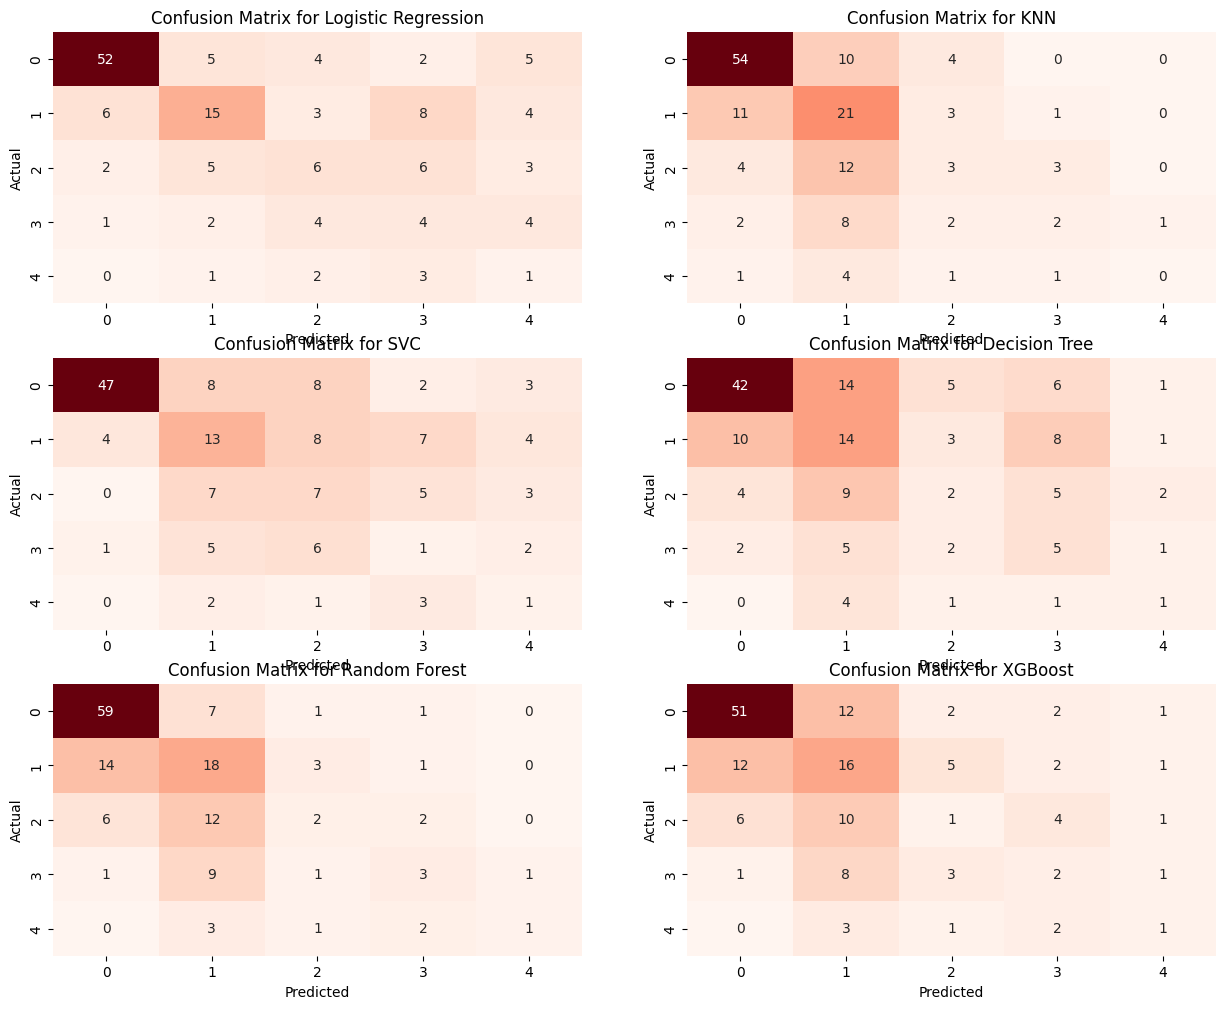

In [ ]:
plt.figure(figsize=(15, 12))

i =0
for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.subplot(3, 2 , i+1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    i+=1

plt.tight_layout()
plt.show()


In [ ]:
pd.DataFrame(train_accuracy)


,Model,Training Accuracy
0,Logistic Regression,0.588435
1,KNN,1.000000
2,SVC,0.637755
3,Decision Tree,0.743197
4,Random Forest,0.925170
5,XGBoost,0.921769
6,Gradient Boosting,0.967687


In [ ]:
pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.513514,0.311535,0.303672,0.301641
1,KNN,0.554054,0.344211,0.354468,0.344363
2,SVC,0.466216,0.328217,0.315999,0.315873
3,Decision Tree,0.398649,0.317743,0.321727,0.304867
4,Random Forest,0.554054,0.415840,0.408595,0.407986
5,XGBoost,0.533784,0.365588,0.340740,0.339873
6,Gradient Boosting,0.533784,0.366914,0.357217,0.355813


In [ ]:
print(f'The best model is {best_model} with an accuracy score of {best_score}')


The best model is Random Forest with an accuracy score of 0.5540540540540541


### Improvements
other imputation techniques

better encoding of categorical columns

cross-validation

calculate feature importance on a model

hyper-parameter tuning

In [357]:
model = KNeighborsClassifier(n=5)

TypeError: KNeighborsClassifier.__init__() got an unexpected keyword argument 'n'

In [306]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        736 non-null    int64  
 1   age                       736 non-null    float64
 2   dataset                   736 non-null    object 
 3   trestbps                  736 non-null    float64
 4   chol                      736 non-null    float64
 5   thalch                    736 non-null    float64
 6   oldpeak                   736 non-null    float64
 7   num                       736 non-null    int64  
 8   thal_normal               736 non-null    int32  
 9   thal_reversable defect    736 non-null    int32  
 10  ca_1.0                    736 non-null    int32  
 11  ca_2.0                    736 non-null    int32  
 12  ca_3.0                    736 non-null    int32  
 13  slope_flat                736 non-null    int32  
 14  slope_upsl

In [307]:
model.fit(X, y)
datat = test.drop(columns = ['id', 'dataset'])
predictions = model.predict(datat)
submission_df = pd.DataFrame({
    'ID': test.index,
    'num': predictions
})
submission_df.to_csv('submit.csv', index = False)

In [308]:
submission_df

,ID,num
0,0,0
1,1,0
2,2,1
3,3,2
4,4,1
...,...,...
179,179,0
180,180,2
181,181,0
182,182,0
